In [1]:
import nltk
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from IPython.display import Image
pd.options.display.max_colwidth = 100

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_table(r'C:\Users\Natarajan\Dropbox\MBA Docs\Semester 2\My ML presentation\sms.tsv',header = None,names = ['label','text'])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [3]:
df.shape

(5572, 2)

In [4]:
"""Examine the class distribution"""
print(df.label.value_counts())
print("Total:",df.label.value_counts().sum())

ham     4825
spam     747
Name: label, dtype: int64
Total: 5572


In [5]:
"""Convert spam to 1 (a success) and ham to a 0 (failure)"""
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives around here though",0


In [6]:
"""Define the features and output"""
X = df['text'] # The features that we will be using -> our X vector
y = df['label_num'] # The output class for our features
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [7]:
"""Split the data into the training and testing sets"""
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape) # Feature matrix of the training set
print(X_test.shape) # Feature matrix of the testing set
print(y_train.shape) # Class vector of the training set
print(y_test.shape) # Class vector of the testing set

(4179,)
(1393,)
(4179,)
(1393,)


In [8]:
"""Instantiate the vectorizer"""
ngram = 2
default_stopwords = set(nltk.corpus.stopwords.words('english')) # Create the default stopwords set
vect = CountVectorizer(ngram_range=(ngram,ngram),stop_words = default_stopwords)

In [9]:
"""Learn training data vocabulary, then use it to create a document-term matrix"""
%time X_train_dtm = vect.fit_transform(X_train) 

Wall time: 136 ms


In [10]:
X_train_dtm

<4179x25122 sparse matrix of type '<class 'numpy.int64'>'
	with 33079 stored elements in Compressed Sparse Row format>

# What is a Sparse Matrix?

In [11]:
dm = pd.DataFrame(X_train_dtm.toarray(),columns = vect.get_feature_names())
# dm.iloc[dm[0].nonzero()[0]]
dm.iloc[:,1000:]

,9t sd,9th player,____ joy,a21 valid,aa exhaust,aah bless,aah speak,aaniye pudunga,aaooooright work,aathi dear,...,zhong se,zindgi wo,zoe 18,zoe hit,zogtorius staring,zoom cine,zouk nichols,zyada kisi,ú1 20,〨ud evening
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Have to be careful with this!

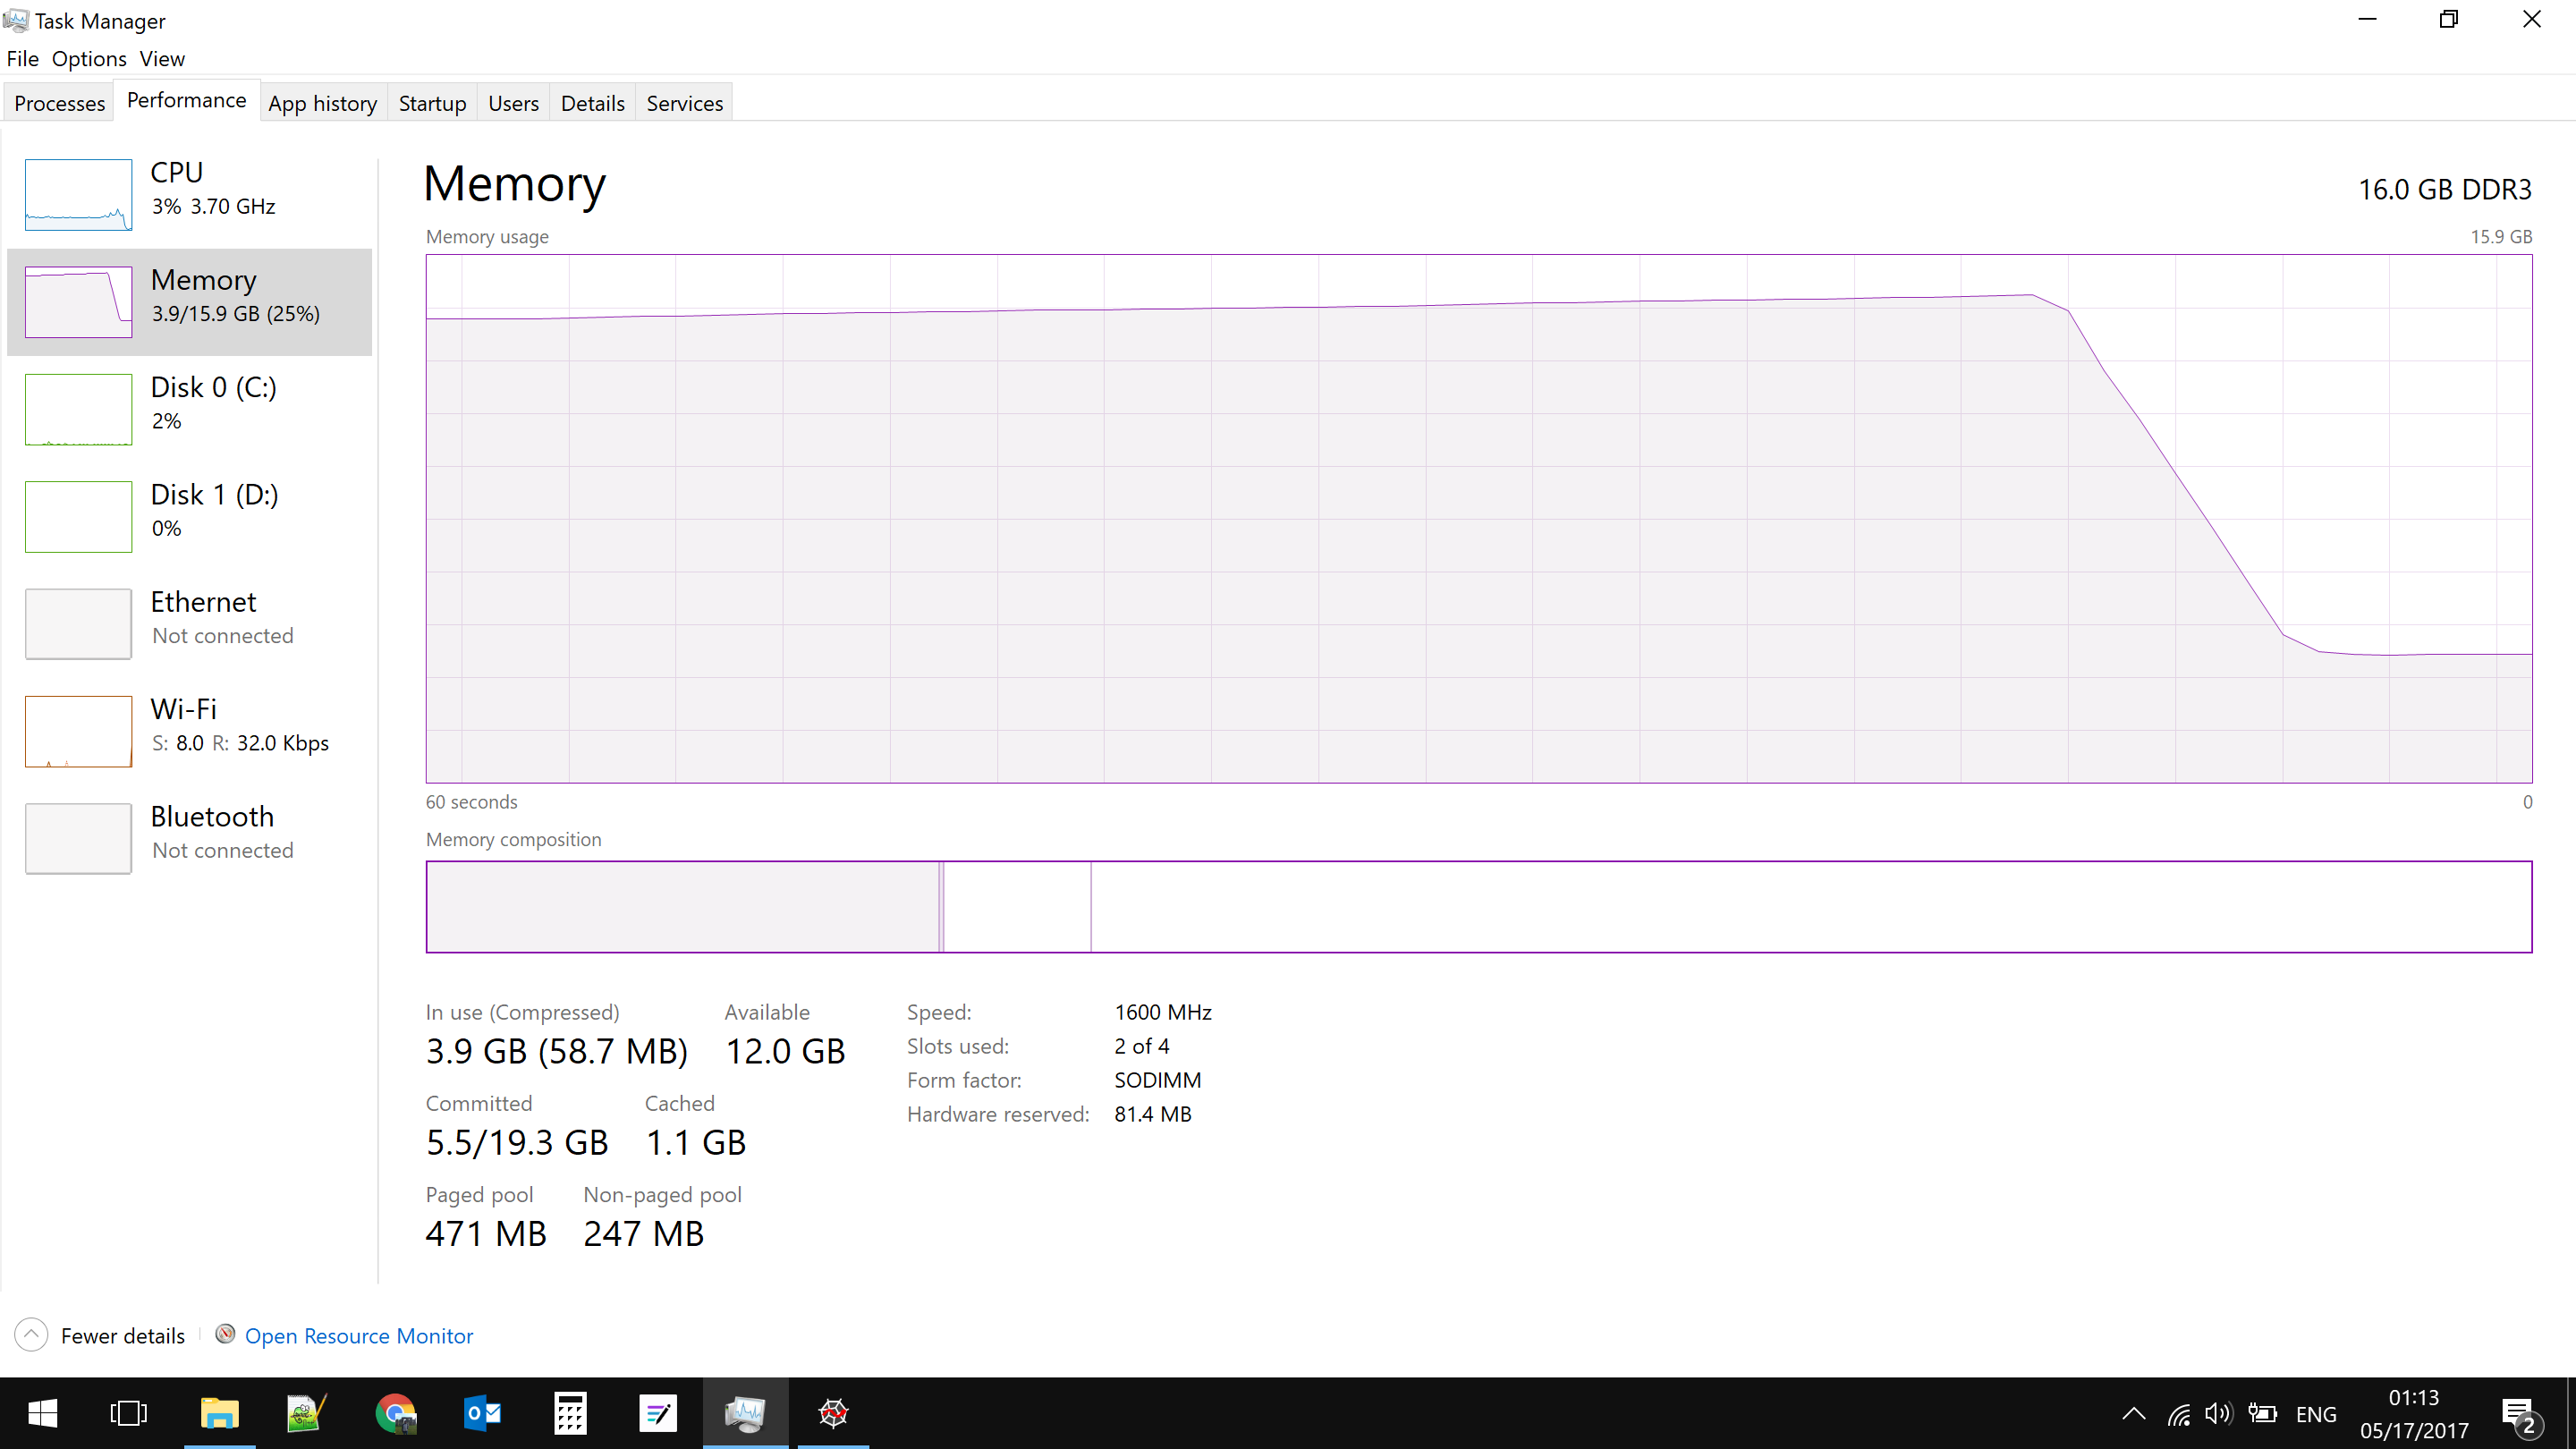

In [26]:
Image(r'C:\Users\Natarajan\Dropbox\MBA Docs\Semester 2\My ML presentation\pics\memory usage.png')

In [13]:
"""Transform testing data (using fitted vocabulary) into a document-term matrix"""
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x25122 sparse matrix of type '<class 'numpy.int64'>'
	with 4093 stored elements in Compressed Sparse Row format>

In [14]:
"""Instantiate our Logistic Regression Model with default parameters"""
logreg = LogisticRegression()

In [15]:
"""Fit our training feature matrix and output vector"""
%time logreg.fit(X_train_dtm,y_train)

Wall time: 19 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Predict

In [16]:
y_pred_class_logreg = logreg.predict(X_test_dtm)

In [17]:
print(np.round(metrics.accuracy_score(y_test, y_pred_class_logreg) * 100,2),'% accurate')

94.26 % accurate


In [18]:
"""Custom function to show the features and their parameters"""
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

show_most_informative_features(vect,logreg)

	-1.2800	lt gt          		2.9294	co uk          
	-0.5544	work please    		2.4625	please call    
	-0.5466	call later     		1.8297	dating service 
	-0.5391	take care      		1.7869	send stop      
	-0.4540	let know       		1.5487	claim call     
	-0.4203	sorry call     		1.4351	po box         
	-0.4111	good morning   		1.3805	chance win     
	-0.3573	ok lor         		1.3716	mobile content 
	-0.3470	call please    		1.3645	txt stop       
	-0.3098	last night     		1.3264	prize claim    
	-0.2818	great day      		1.2788	reply stop     
	-0.2762	new year       		1.2695	88066 lost     
	-0.2713	pls send       		1.2450	txt word       
	-0.2601	wat time       		1.2177	150p msg       
	-0.2570	good night     		1.1625	every week     
	-0.2375	home please    		1.1569	text stop      
	-0.2328	decimal gt     		1.1523	call mobileupd8
	-0.2328	lt decimal     		1.0993	account statement
	-0.2261	dont know      		1.0782	selected receive
	-0.2179	happy new      		1.0690	new message    


# Metrics

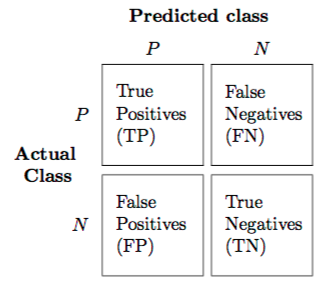

In [28]:
"""Confusion matrix"""
Image(r'C:\Users\Natarajan\Dropbox\MBA Docs\Semester 2\My ML presentation\pics\confusion.png')

In [20]:
print(metrics.confusion_matrix(y_test, y_pred_class_logreg)) # The actual confusion matrix

[[1215    0]
 [  80   98]]


In [21]:
confusion = metrics.confusion_matrix(y_test, y_pred_class_logreg)
TP = confusion[1, 1] # True positive
TN = confusion[0, 0] # True Negative
FP = confusion[0, 1] # False positive
FN = confusion[1, 0] # False Negative
print('True Positive:',TP)
print('True Negative:',TN)
print('False Positive:',FP)
print('False Negative:',FN)

True Positive: 98
True Negative: 1215
False Positive: 0
False Negative: 80


In [22]:
"""Determining the class is done by the probability cut off at 0.5"""
[i for i in zip(logreg.predict(X_test_dtm),logreg.predict_proba(X_test_dtm))][:40]

[(0, array([ 0.96912428,  0.03087572])),
 (0, array([ 0.9688754,  0.0311246])),
 (0, array([ 0.96923485,  0.03076515])),
 (0, array([ 0.97232128,  0.02767872])),
 (0, array([ 0.97067949,  0.02932051])),
 (0, array([ 0.97116661,  0.02883339])),
 (0, array([ 0.9682941,  0.0317059])),
 (0, array([ 0.96745045,  0.03254955])),
 (0, array([ 0.96745045,  0.03254955])),
 (0, array([ 0.96913616,  0.03086384])),
 (1, array([ 0.0127415,  0.9872585])),
 (0, array([ 0.96745045,  0.03254955])),
 (0, array([ 0.94009758,  0.05990242])),
 (0, array([ 0.96745045,  0.03254955])),
 (0, array([ 0.96913616,  0.03086384])),
 (0, array([ 0.98204404,  0.01795596])),
 (0, array([ 0.96886485,  0.03113515])),
 (0, array([ 0.96932783,  0.03067217])),
 (0, array([ 0.96815108,  0.03184892])),
 (0, array([ 0.97264147,  0.02735853])),
 (0, array([ 0.9830791,  0.0169209])),
 (0, array([ 0.96872898,  0.03127102])),
 (0, array([ 0.98307643,  0.01692357])),
 (1, array([ 0.13194119,  0.86805881])),
 (0, array([ 0.96745045,

In [23]:
# print message text for the false positives (ham incorrectly classified as spam)
X_test[y_test < y_pred_class_logreg]

Series([], Name: text, dtype: object)

In [24]:
# print message text for the false positives (ham incorrectly classified as spam)
X_test[y_test > y_pred_class_logreg][:10]

3530    Xmas & New Years Eve tickets are now on sale from the club, during the day from 10am till 8pm, a...
1269    Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2mor...
4373    Ur balance is now £600. Next question: Complete the landmark, Big, A. Bob, B. Barry or C. Ben ?....
4864        Bored housewives! Chat n date now! 0871750.77.11! BT-national rate 10p/min only from landlines!
3423    Freemsg: 1-month unlimited free calls! Activate SmartCall Txt: CALL to No: 68866. Subscriptn3gbp...
3998        Bored housewives! Chat n date now! 0871750.77.11! BT-national rate 10p/min only from landlines!
1875                   Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
717     +449071512431 URGENT! This is the 2nd attempt to contact U!U have WON £1250 CALL 09071512433 b4 ...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL...
3968    YOU HAVE WON! As a v